Image classification : binary problem

If cells are contaminated with mycoplasma probability is close to 1,
if cells are not infected probability is close to 0.

Contaminated cells labeled with : 1
No infected cells labeled with : 0

### Biblioteki i Pakiety

In [327]:
import os
import numpy as np
import pandas as pd
import cv2
from PIL import Image

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical, normalize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Wczytywanie Katalogów ze Zdjęciami

In [306]:
# ścieżki do katalogów z obrazami komórek z mykoplazmą (positive) i bez mykoplazmy (negative)
positive_directory = "C:/Users/IgA/Documents/Machine_learning_Chemia/mycoplasma/all/positive"
negative_directory = "C:/Users/IgA/Documents/Machine_learning_Chemia/mycoplasma/all/negative"

# sprawdzanie czy ścieżki do folderów są prawidłowe i jakie pliki się w nich znajdują
def check_directory(directory, name):
    if not os.path.exists(directory):
        print(f"Ścieżka do folderu {name} NIE jest prawidłowa")
    else:
        print(f"Ścieżka do folderu {name} JEST PRAWIDŁOWA")
        print('----------------------------------------------')
        print(f"Pliki w katalogu '{name}':")
        print(os.listdir(directory))  # Wyświetlenie zawartości katalogu

# printowanie wyników
check_directory(positive_directory, "positive")
print()
print()
check_directory(negative_directory, "negative")

Ścieżka do folderu positive JEST PRAWIDŁOWA
----------------------------------------------
Pliki w katalogu 'positive':
['mycoplasma_positive_1.jpg', 'mycoplasma_positive_2.jpg', 'mycoplasma_positive_3.jpg', 'mycoplasma_positive_4.jpg', 'mycoplasma_positive_5.jpg', 'mycoplasma_positive_6.jpg', 'positive_labels.json']


Ścieżka do folderu negative JEST PRAWIDŁOWA
----------------------------------------------
Pliki w katalogu 'negative':
['mycoplasma_negative_1.jpg', 'mycoplasma_negative_2.jpg', 'mycoplasma_negative_3.jpg', 'mycoplasma_negative_4.jpg', 'mycoplasma_negative_5.jpg', 'mycoplasma_negative_6.jpg', 'negative_labels.json']


### Docelowe Wymiary Obrazów i Utworzenie List

In [307]:
# wymiary do których obrazy zostaną przycięte (wszystkie muszą mieć takie same wymiary)
width = 300
height = 300

# listy do przechowywania kolejno obrazów i etykiet
images = []
labels = []

### Zmiana Rozmiarów Obrazów i Dodanie Etykiet

In [308]:
mycoplasma_positive = os.listdir(positive_directory)
mycoplasma_negative = os.listdir(negative_directory)

for directory, class_label in [(positive_directory, 1), (negative_directory, 0)]:
    image_names = os.listdir(directory)
    for image_name in image_names:
        if image_name.endswith('.jpg'):
            image_path = os.path.join(directory, image_name)
            image = cv2.imread(image_path)
            image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'RGB')
            image_size = image.resize((width, height))
            images.append(np.array(image_size))
            labels.append(class_label)

In [309]:
dataset = np.array(images)
labels = np.array(labels)

print("Number of images in dataset:", len(dataset))
print("Number of labels in dataset:", len(labels))  

Number of images in dataset: 12
Number of labels in dataset: 12


In [310]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.20, random_state = 0)

# X_train = normalize(X_train, axis = 1)
# X_test = normalize(X_test, axis = 1)

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [311]:
input_shapes = (width, height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = input_shapes))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

print(model.summary())

C:\Users\IgA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 298, 298, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 147, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 147, 147, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 71, 71, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │     5,017,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_72 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_73 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,046,369 (19.25 MB)

 Trainable params: 5,046,369 (19.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [312]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    verbose = 1, #2 dla bardziej szczegółowych informacji, 0 dla braku
    epochs = 100,
    validation_data = (X_test, y_test),
    shuffle = False, # True zapobiega przeuczeniu danych, początkowo było False            
    )

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 0.6902 - val_accuracy: 0.6667 - val_loss: 0.6352
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6667 - loss: 0.7796 - val_accuracy: 0.3333 - val_loss: 1.1546
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6667 - loss: 1.0218 - val_accuracy: 0.6667 - val_loss: 0.6214
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6667 - loss: 0.5161 - val_accuracy: 0.6667 - val_loss: 0.6264
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8889 - loss: 0.3774 - val_accuracy: 0.6667 - val_loss: 0.6225
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8889 - loss: 0.2798 - val_accuracy: 1.0000 - val_loss: 0.6200
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 1.0000 - loss: 0.1837 - val_accuracy: 0.3333 - val_loss: 0.6949
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 0.6667 - val_

In [313]:
model.save('mycoplasma_model.h5')

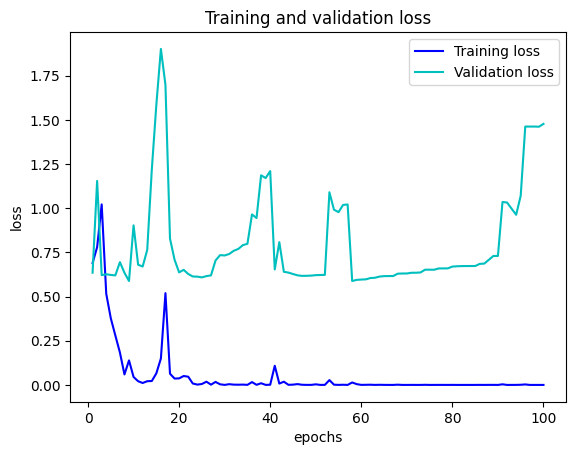

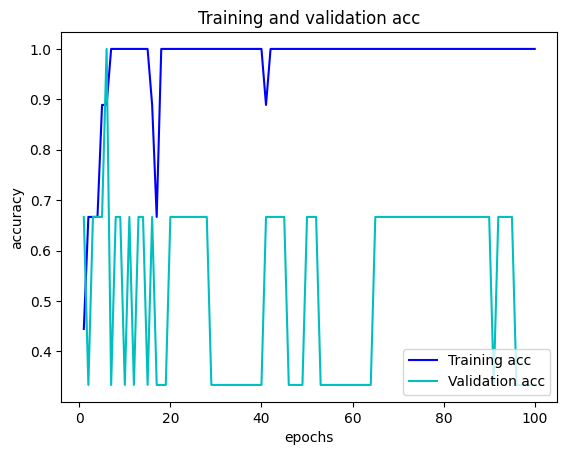

In [314]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'c', label = 'Validation loss')

plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'c', label = 'Validation acc')

plt.title('Training and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction:  [[0.96628976]]
Real label:  1


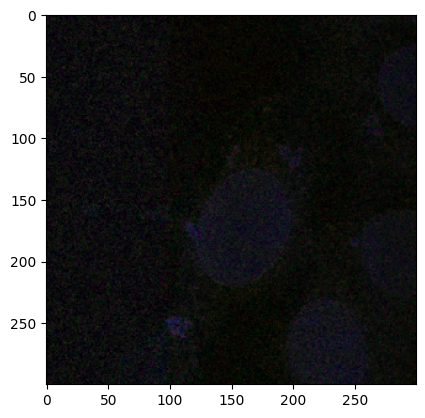

In [315]:
n=2
img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis = 0)

print('Prediction: ', model.predict(input_img))
print('Real label: ', y_test[n])

In [316]:
_, acc = model.evaluate(X_test, y_test)
print('accuracy: ', (acc * 100.0), '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3333 - loss: 1.4774
accuracy:  33.33333432674408 %


confusion matrix

In [322]:
mythreshold = 0.6
from sklearn.metrics import confusion_matrix

In [323]:
y_pred = (model.predict(X_test) >= mythreshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0 2]
 [0 1]]


ROC

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


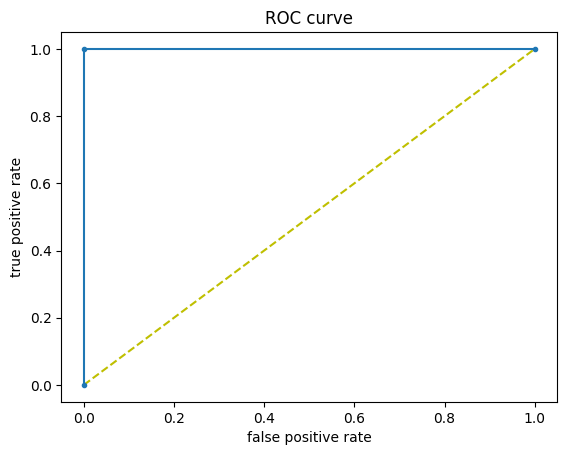

In [324]:
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [325]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  1    0.96629
Name: thresholds, dtype: float32


In [326]:
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  1.0
